<a href="https://colab.research.google.com/github/DimDragg/-/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Чуркін Дмитро, був присутній на парі, ФІТ 2-15, в списку 13, таблиця N*3

In [2]:
import numpy as np
from math import factorial

# Значення з таблиці
x = np.array([0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65])
y = np.array([0.8607, 0.8187, 0.7788, 0.7408, 0.7046, 0.6703, 0.6376, 0.6065, 0.5769, 0.5488, 0.5220])

# Перша інтерполяційна формула Ньютона (вперед)
def newton_forward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]  # Крок має бути сталим
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            delta_y[i, j] = delta_y[i + 1, j - 1] - delta_y[i, j - 1]

    q = (x0 - x[0]) / h
    ans = delta_y[0, 0]
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q - i + 1)
        ans += (q_prod * delta_y[0, i]) / factorial(i)

    return ans

# Значення, які потрібно інтерполювати
x_values_to_interpolate = [0.151, 0.223, 0.252, 0.505, 0.554, 0.457]

# Результати
for x0 in x_values_to_interpolate:
    y0 = newton_forward_interpolation(x, y, x0)
    print(f"f({x0}) = {y0:.6f}")

f(0.151) = 0.859903
f(0.223) = 0.800025
f(0.252) = 0.777250
f(0.505) = 0.603478
f(0.554) = 0.574588
f(0.457) = 0.633147


In [3]:
import numpy as np
from math import factorial

# Дані з таблиці (x і y)
x = np.array([0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65])
y = np.array([0.8607, 0.8187, 0.7788, 0.7408, 0.7046, 0.6703, 0.6376, 0.6065, 0.5769, 0.5488, 0.5220])

# Друга (зворотна) інтерполяційна формула Ньютона
def newton_backward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]  # Рівномірний крок

    # Таблиця кінцевих різниць
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            delta_y[i, j] = delta_y[i + 1, j - 1] - delta_y[i, j - 1]

    q = (x0 - x[-1]) / h
    ans = delta_y[-1, 0]
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q + i - 1)
        ans += (q_prod * delta_y[n - i - 1, i]) / factorial(i)

    return ans

# Точки для обчислення поблизу кінця таблиці (0.505, 0.554, 0.457)
x_values_to_interpolate = [0.505, 0.554, 0.457]

for x0 in x_values_to_interpolate:
    y0 = newton_backward_interpolation(x, y, x0)
    print(f"f({x0}) = {y0:.6f}")

f(0.505) = 0.603478
f(0.554) = 0.574588
f(0.457) = 0.633147


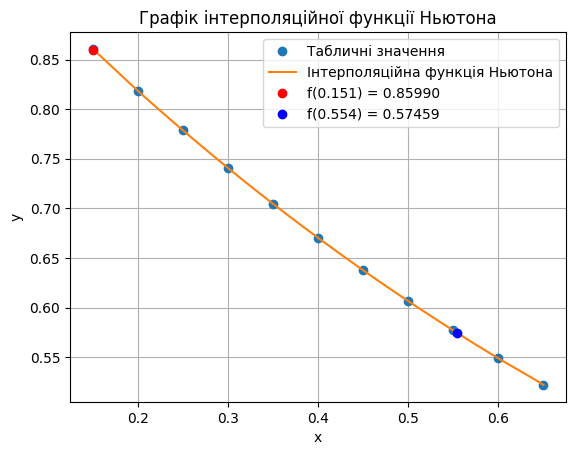

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Дані з таблиці
x = np.array([0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65])
y = np.array([0.8607, 0.8187, 0.7788, 0.7408, 0.7046, 0.6703, 0.6376, 0.6065, 0.5769, 0.5488, 0.5220])

# Пряма формула Ньютона
def newton_forward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            delta_y[i, j] = delta_y[i + 1, j - 1] - delta_y[i, j - 1]
    q = (x0 - x[0]) / h
    ans = delta_y[0, 0]
    q_prod = 1
    for i in range(1, n):
        q_prod *= (q - i + 1)
        ans += (q_prod * delta_y[0, i]) / factorial(i)
    return ans

# Зворотна формула Ньютона
def newton_backward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            delta_y[i, j] = delta_y[i + 1, j - 1] - delta_y[i, j - 1]
    q = (x0 - x[-1]) / h
    ans = delta_y[-1, 0]
    q_prod = 1
    for i in range(1, n):
        q_prod *= (q + i - 1)
        ans += (q_prod * delta_y[n - i - 1, i]) / factorial(i)
    return ans

# Обчислення y1 і y2
x1 = 0.151  # ближче до початку відрізка
y1 = newton_forward_interpolation(x, y, x1)

x2 = 0.554  # ближче до кінця відрізка
y2 = newton_backward_interpolation(x, y, x2)

# Побудова графіка
xx = np.linspace(np.min(x), np.max(x), 200)
yy = np.zeros_like(xx)

for i in range(len(xx)):
    if xx[i] <= x[len(x) // 2]:
        yy[i] = newton_forward_interpolation(x, y, xx[i])
    else:
        yy[i] = newton_backward_interpolation(x, y, xx[i])

plt.plot(x, y, 'o', label='Табличні значення')
plt.plot(xx, yy, label='Інтерполяційна функція Ньютона')
plt.plot(x1, y1, 'ro', label=f'f({x1}) = {y1:.5f}')
plt.plot(x2, y2, 'bo', label=f'f({x2}) = {y2:.5f}')
plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()